Uploading CSV Files

In [7]:
# from google.colab import files
# files.upload()

Package Importing

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import plotly.express as px


In [9]:
# !pip install prophet

In [10]:
data =pd.read_csv('/content/AAPL.csv')

#EDA

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7111 non-null   object 
 1   Open       7111 non-null   float64
 2   High       7111 non-null   float64
 3   Low        7111 non-null   float64
 4   Close      7111 non-null   float64
 5   Adj Close  7111 non-null   float64
 6   Volume     7111 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 389.0+ KB


In [12]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7.111000e+03
mean,26.026024,26.323060,25.737972,26.042884,25.033650,4.005232e+08
std,42.536412,43.057522,42.047141,42.577014,42.322263,3.787951e+08
min,0.114955,0.118304,0.113839,0.115513,0.098315,3.519590e+07
25%,0.410536,0.418917,0.401786,0.410803,0.349642,1.424998e+08
50%,6.075714,6.148929,5.946429,6.054643,5.153219,2.850260e+08
75%,28.987500,29.192500,28.713750,28.917500,26.498893,5.232066e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,7.421641e+09


In [13]:
data=data.drop("Adj Close",axis='columns')

In [14]:

data.index = pd.DatetimeIndex(data['Date'])


<ipython-input-14-7740844a252a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.index = pd.DatetimeIndex(data['Date'])


In [15]:
data.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
1995-01-24,24-01-1995,0.377232,0.378348,0.369420,0.371652,218097600
1995-01-25,25-01-1995,0.352679,0.375000,0.352679,0.365932,517070400
1995-01-26,26-01-1995,0.364955,0.370536,0.350446,0.352679,246388800
1995-01-27,27-01-1995,0.356027,0.360491,0.348214,0.356027,298569600
1995-01-30,30-01-1995,0.358259,0.361607,0.356027,0.358259,230585600


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7111 entries, 1995-01-24 to 2023-04-21
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7111 non-null   object 
 1   Open    7111 non-null   float64
 2   High    7111 non-null   float64
 3   Low     7111 non-null   float64
 4   Close   7111 non-null   float64
 5   Volume  7111 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 388.9+ KB


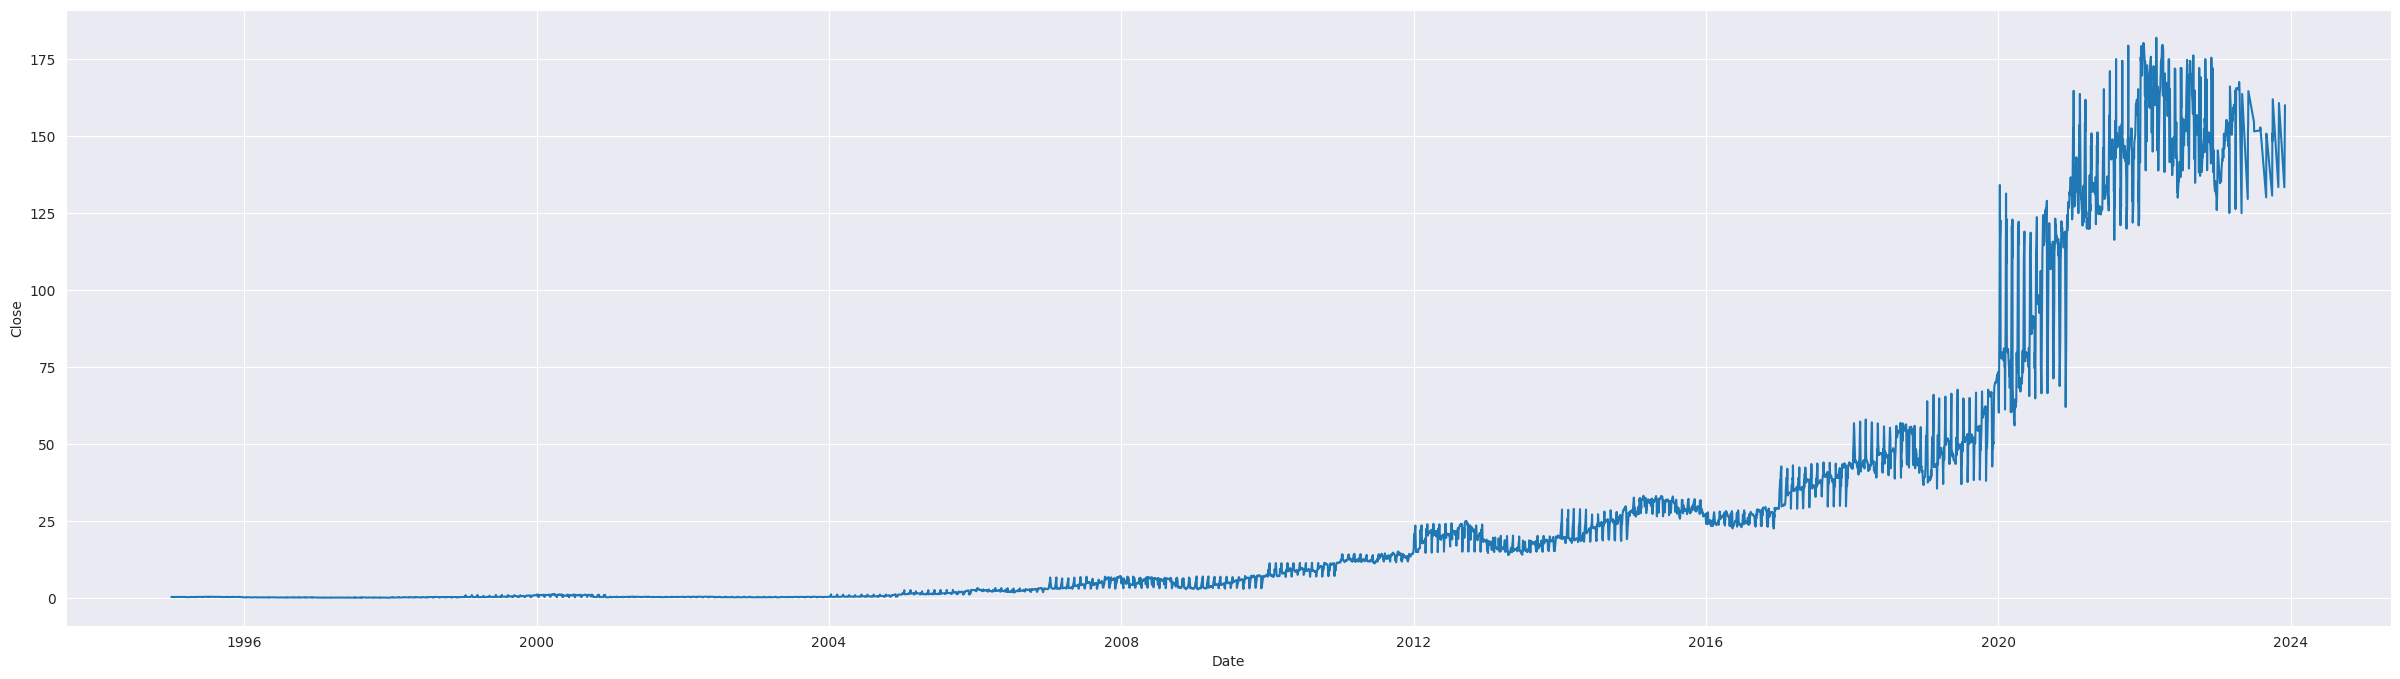

In [17]:
plt.figure(figsize=(30,8))
sns.set_style('darkgrid')
sns.lineplot(y='Close',x=data.index,data=data)
plt.show()

Selecting Feature & Label

In [18]:
X = data.drop('Close', axis='columns')
y = data['Close']

In [19]:
X.shape,y.shape

((7111, 5), (7111,))

In [20]:
#Check for missing values
X.isnull().sum()
# No missing values , so no need of imputation on dataset is required

Date      0
Open      0
High      0
Low       0
Volume    0
dtype: int64

In [21]:
X = X.drop('Date',axis='columns')

In [22]:
X.head()

,Open,High,Low,Volume
Date,,,,
1995-01-24,0.377232,0.378348,0.369420,218097600
1995-01-25,0.352679,0.375000,0.352679,517070400
1995-01-26,0.364955,0.370536,0.350446,246388800
1995-01-27,0.356027,0.360491,0.348214,298569600
1995-01-30,0.358259,0.361607,0.356027,230585600


In [23]:
closedf = data[['Date','Close']]
print("Shape of close dataframe:", data.shape)

Shape of close dataframe: (7111, 6)


In [24]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'Date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Data splitting with ratio of train:test as 80:20



In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

#Defining of preprocessing funtion

#Feature Scaling

---



In [84]:

scaler = MinMaxScaler()
num = ['Open','High','Low','Volume']

X_train[num]= scaler.fit_transform(X_train[num])
X_test[num]= scaler.fit_transform(X_test[num])


#Model Selection : Deciding of optimal parameters 




In [85]:
mlp = MLPRegressor(warm_start=True,random_state=48, solver  = 'adam',
    hidden_layer_sizes= (75,100,120),
    activation ='relu',
    alpha = 0.0001,
    learning_rate = 'adaptive',
    max_iter = 1200,
    early_stopping=True)

# grid_param = {validation_fraction
#     'solver' : ['adam','lbfgs','sgd'],
#     'hidden_layer_sizes': [(250,200,150)],
#     'activation':['relu','logistic','tanh'],
#     'alpha': [
#         0.0001, 0.001],
#     'learning_rate': ['adaptive','invscaling', 'constant'],
#     'max_iter' : [15000]
# }

#Model Fitting and Validation Scoring

In [59]:

# grid_search = GridSearchCV(mlp, grid_param, cv = 3, n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_

best_model = mlp.fit(X_train, y_train,)
kfold = KFold(n_splits=5)
val_score = cross_val_score(best_model,X_train,y_train,cv=kfold)

In [60]:
print("Validation Score of given Model is : ", val_score)

Validation Score of given Model is :  [0.99978016 0.99975765 0.99978928 0.99973129 0.99977711]


In [30]:
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test)
print('R2 score of Model is ',r2_score(y_test, y_pred))

R2 score of Model is  0.999622828760452


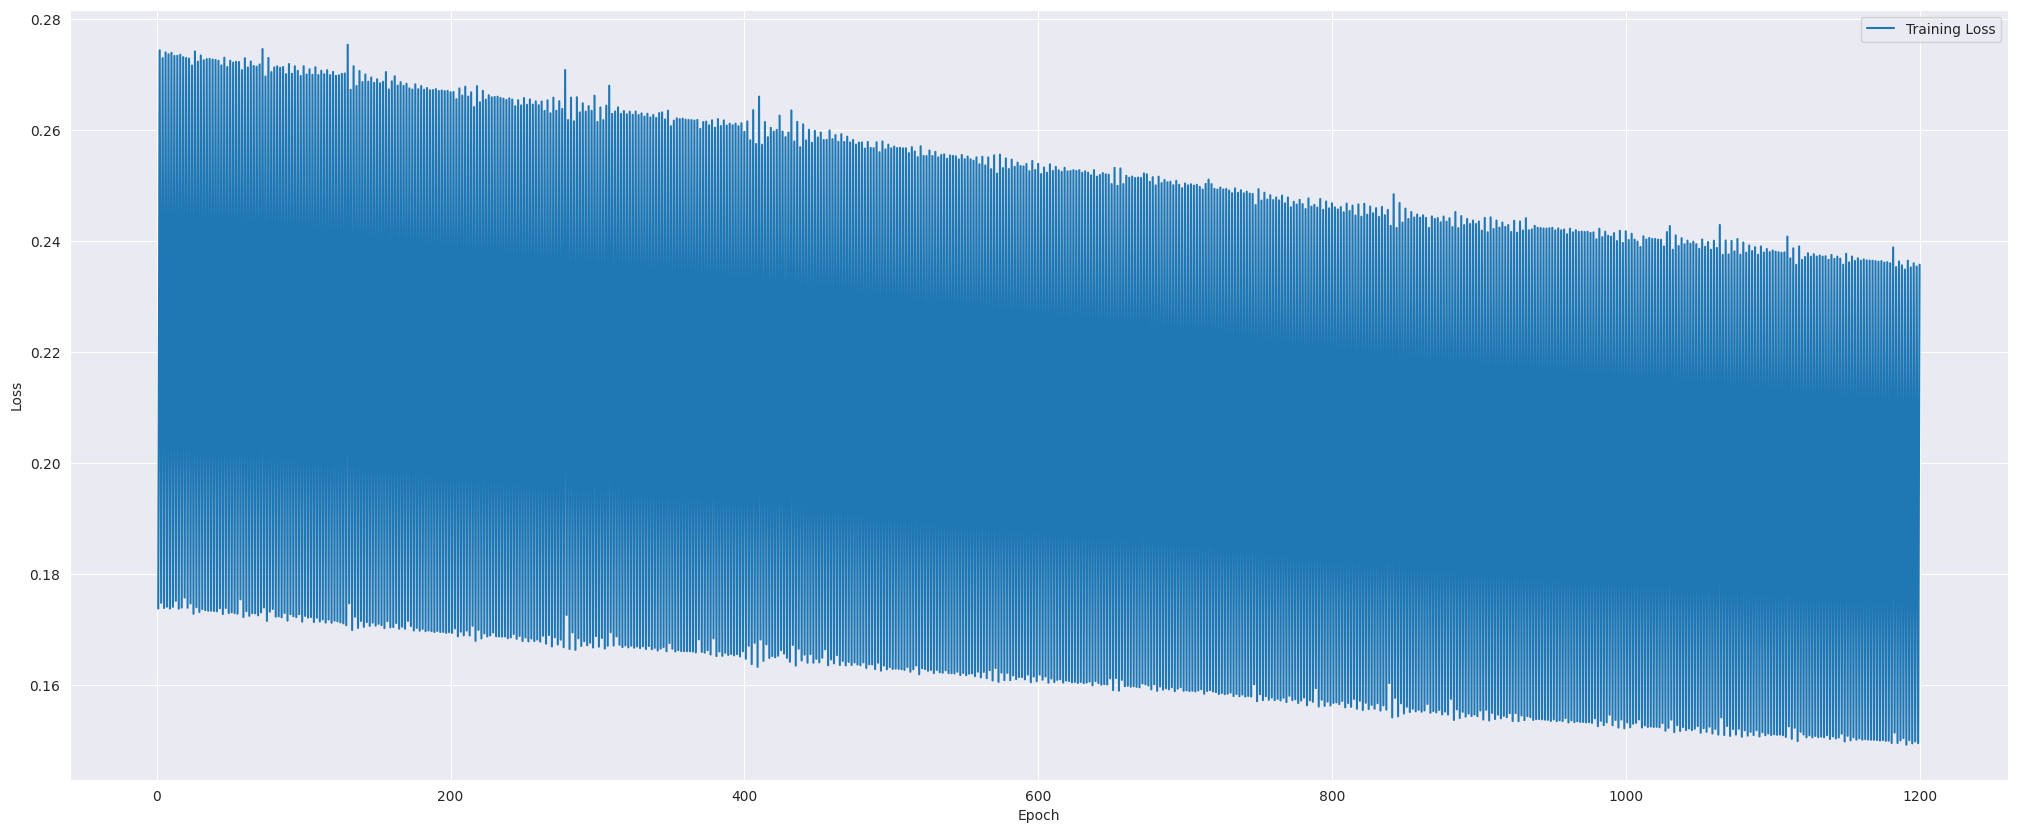

In [95]:
# Train the model and record the training and validation losses for each epoch
train_losses = []
val_losses = []
for i in range(mlp.max_iter):
    mlp.fit(X_train, y_train)
    train_losses.append(mlp.loss_)



val_losses = mlp.validation_scores_


# Plot the training and validation losses vs epochs
epochs = np.arange(1, mlp.max_iter+1)
plt.figure(figsize=(25,10))
# plt.ylim(0.1, 1)
# plt.yticks(np.arange(0.24, 1.1, 0.01))
# plt.plot(range(len(val_losses)), val_losses,label='Validation Loss')
plt.plot(epochs, train_losses,label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

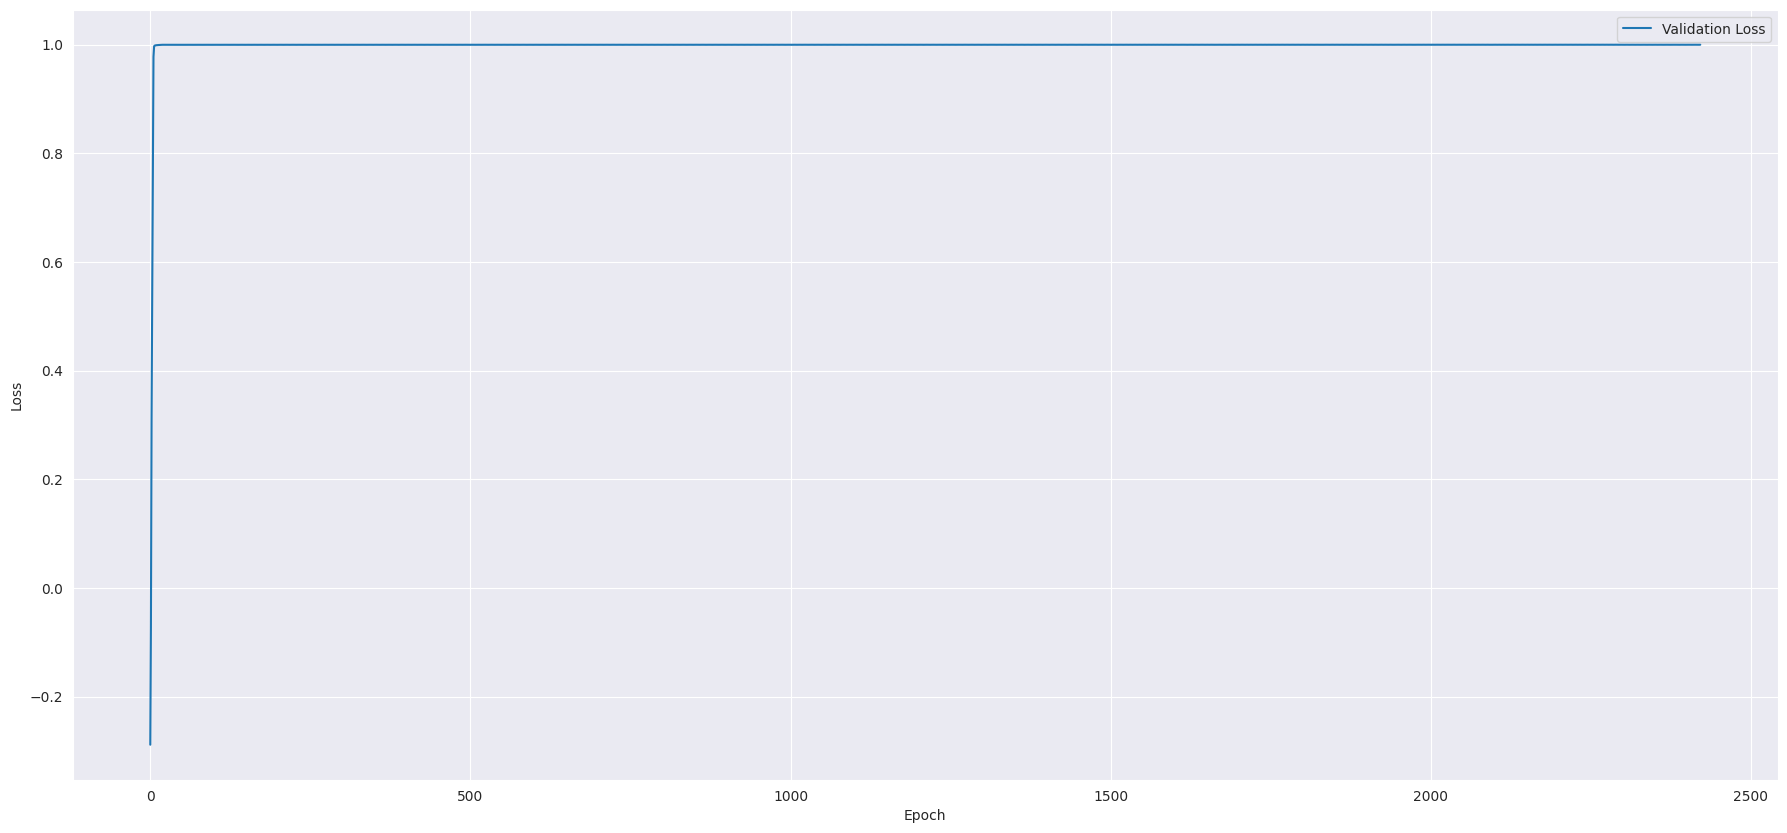

In [94]:
plt.figure(figsize=(22,10))
plt.plot(range(len(val_losses)), val_losses,label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [81]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3)

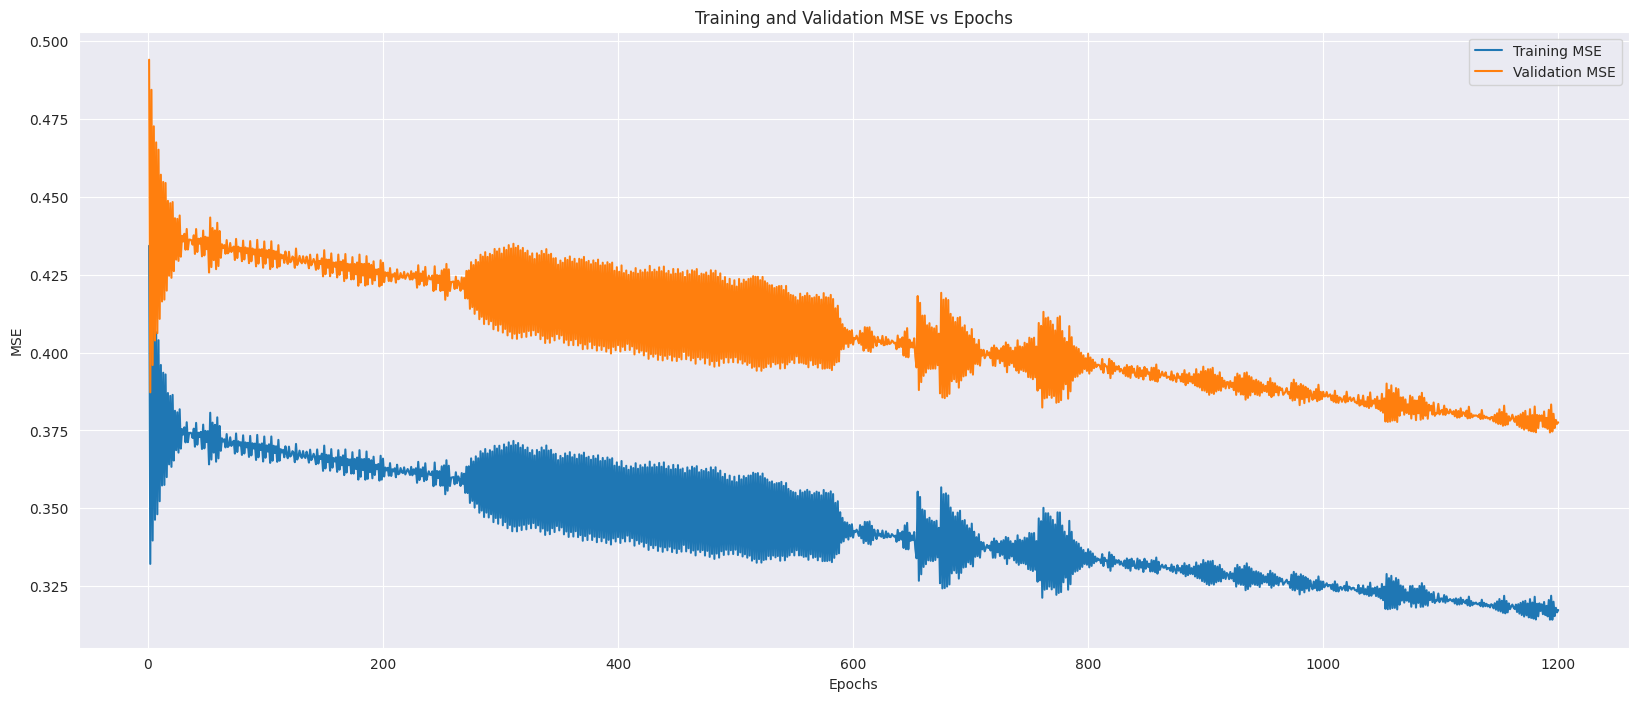

In [82]:
train_errors, val_errors = [], []
for i in range(mlp.max_iter):
    mlp.fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_val_pred = mlp.predict(X_valid)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_valid, y_val_pred))

# plot the training and validation errors
plt.figure(figsize=(20,8))
epochs = np.arange(1, mlp.max_iter+1)
plt.plot(epochs, train_errors, label='Training MSE')
plt.plot(epochs, val_errors, label='Validation MSE')
plt.title('Training and Validation MSE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [33]:
# Get the weights of the model

print("Weights feeded to First Hidden layer are :", mlp.coefs_[0])

print("Weights feeded to Second Hidden layer are :", mlp.coefs_[1])

print("Weights feeded to Third Hidden layer are :", mlp.coefs_[2])

Weights feeded to First Hidden layer are : [[-1.05839071e-55  2.86455341e-01 -2.42224859e-57 -1.93885456e-01
   2.48660905e-01 -7.21226090e-58  2.82536632e-01 -1.27658613e-55
   1.25568247e-01 -1.88304189e-58 -2.61879308e-01 -1.58534482e+00
  -9.83444159e-62  2.49650875e-01 -7.54544719e-21  1.12773468e-01
  -1.15003579e-01  7.71711182e-02 -2.09440841e-27 -1.30474099e-01
  -1.72560497e-54 -1.52451893e-01 -1.24151254e-01 -4.28565643e-01
   1.23987692e-01  1.95649172e-01 -1.56332210e+00  1.47672599e-60
   1.47777055e-02  5.97250824e-02  8.84406221e-02  8.23665924e-58
  -1.25647956e+00  1.71876410e-01 -3.16503976e-01  2.04458745e-55
  -5.50829250e-02  2.44767213e-01 -1.35057335e-01  2.15881613e-01
  -2.26102400e-57  1.98414548e-01  3.48320800e-01  3.24326826e-01
  -1.34159255e+00 -2.27206744e-22 -5.46499628e-56  1.84567827e-01
   2.11687897e-01  3.16669125e-01 -6.75512222e-02 -1.79675678e-56
  -1.40329685e-01 -9.73362061e-59  3.25032817e-01  3.92591486e-02
   3.39325710e-01 -1.82752866e-65

<Axes: xlabel='Date', ylabel='Close'>

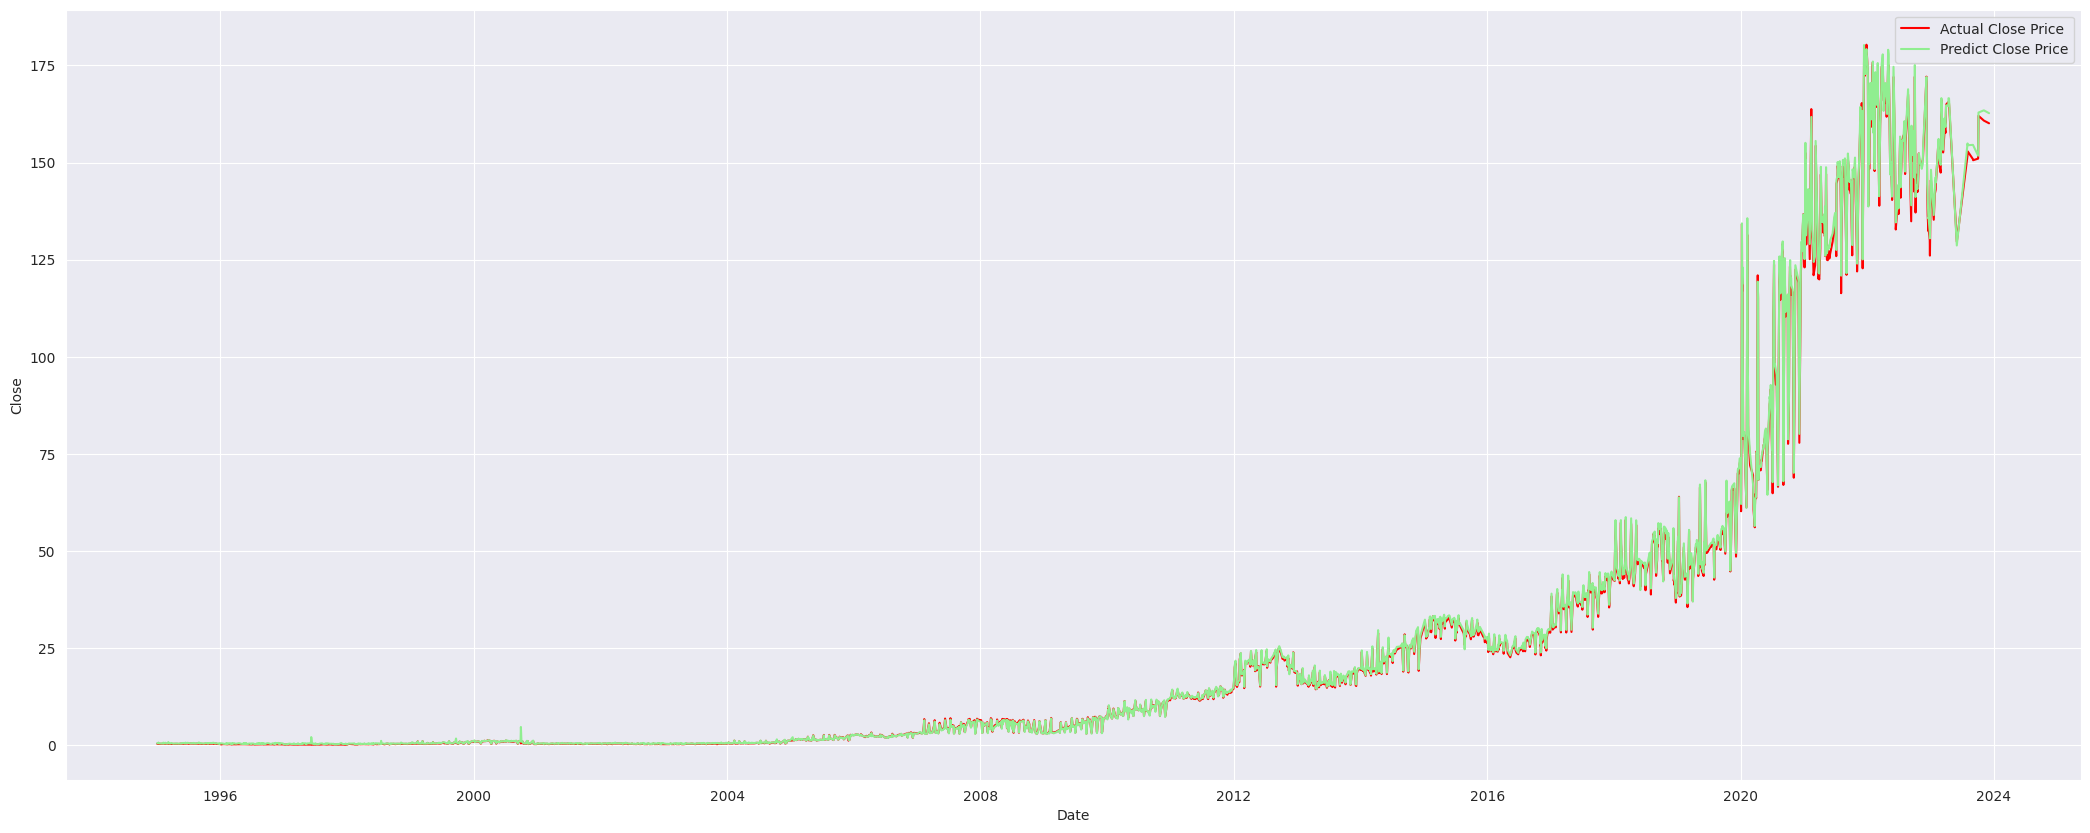

In [34]:

fig,ax =plt.subplots(figsize=(26,10))
sns.set_style('darkgrid')
sns.lineplot( data=y_test,ax=ax,label='Actual Close Price',color='Red')
sns.lineplot( y =y_pred, x=y_test.index, ax=ax,label='Predict Close Price',color='LightGreen')


#Prophet Model for Future Change in Stock Price

In [35]:

future_pred_price = pd.DataFrame(columns=['ds', 'y'])
future_pred_price['ds']= data['Date']
future_pred_price['y'] = data['Close']





In [36]:
future_pred_model = Prophet()
future_pred_model.fit(future_pred_price)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1124: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:271: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphrtfa6yn/e7cz0a_u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphrtfa6yn/s6lt399e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58823', 'data', 'file=/tmp/tmphrtfa6yn/e7cz0a_u.json', 

<Figure size 2500x2000 with 0 Axes>

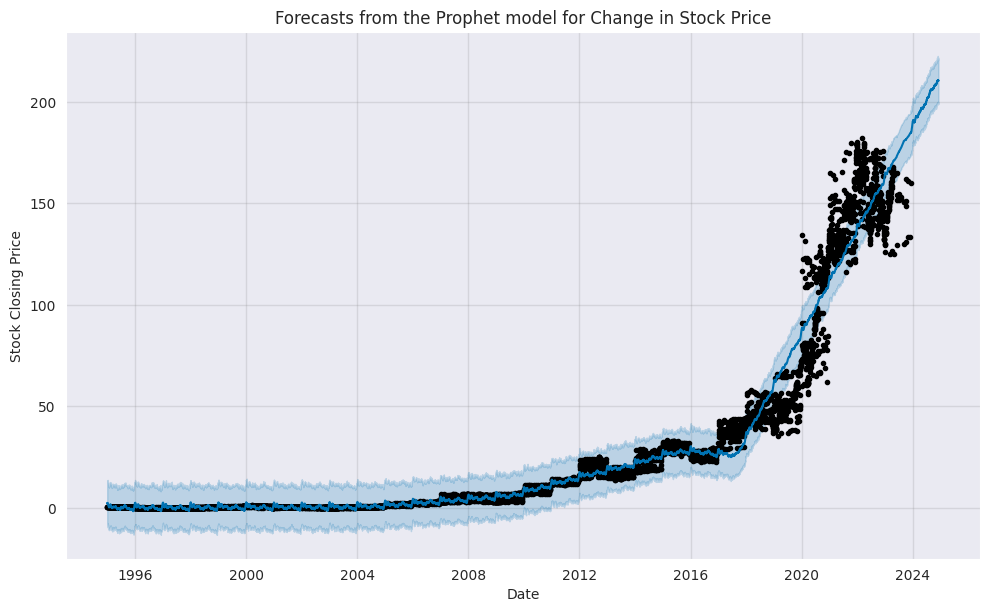

In [37]:

future_dates = future_pred_model.make_future_dataframe(periods=365)
forecast = future_pred_model.predict(future_dates)

plt.figure(figsize=(25,20))
future_pred_model.plot(forecast)
plt.title("Forecasts from the Prophet model for Change in Stock Price")

plt.xlabel('Date')
plt.ylabel('Stock Closing Price')

plt.show()